## CAPSTONE PROJECT 3
### TEAM ID: 
#### PTID-CDS-JUL21-1172																				
### PROJECT ID:
#### PRCP-1010-InsClaimPred
### PROJECT NAME:
#### Insurance Claim Prediction

OBJECTIVE: The target here is to build a Machine Learning model that predicts the probability that a driver will initiate an insurance claim in the following year.


## Introduction:
This is an Insurance Claim Prediction Data Set. The bigger scope is to account for inaccuracies in the cost of insurance policies. A cautious driver should get a better price compared to a reckless driver. The aim is to build a machine learning model to predict whether an auto insurance policy holder files a claim.
### Dataset description:
In data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation. The target columns signifies whether or not a claim was filed for that policy holder.

## IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

## LOADING THE DATASET

In [2]:
pwd

'C:\\Users\\arshad'

In [3]:
cd "C:\Users\arshad\Downloads\PRCP-1010-InsClaimPred\Data"

C:\Users\arshad\Downloads\PRCP-1010-InsClaimPred\Data


In [4]:
data=pd.read_csv('train.csv')

## EXPLORATORY DATA ANALYSIS

In [5]:
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [7]:
data.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='target', ylabel='count'>

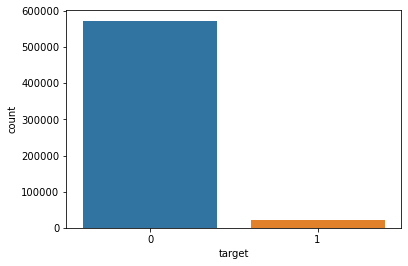

In [8]:
sns.countplot(data['target'])   

Countplot shows that the target variable values are imbalanced.

## DATA PRE-PROCESSING

ID is irrevelant to the given prediction task, so can be removed.

In [10]:
data.drop('id',axis=1,inplace=True)

Since the null values are assigned the value -1, they are first replaced to NaN form and then imputed

In [11]:
data.replace(-1,np.NaN,inplace=True)

Enumerating the null values

In [12]:
data.isnull().sum()

target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0
ps_calc_02             0


In [14]:
# splitting the data
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [15]:
x.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,2.0,5,1.0,0.0,0,1,0,0,0,...,9,1,5,8,0,1,1,0,0,1
1,1,1.0,7,0.0,0.0,0,0,1,0,0,...,3,1,1,9,0,1,1,0,1,0
2,5,4.0,9,1.0,0.0,0,0,1,0,0,...,4,2,7,7,0,1,1,0,1,0
3,0,1.0,2,0.0,0.0,1,0,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,2.0,0,1.0,0.0,1,0,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

Feature elimination need to be carried out as the data contain considerably large number of predictor variables, so as to reduce the computational complexity.

#### Checking for Multi-collinearity

In [16]:
continuous=[]
categorical=[]
binary=[]
ordinal=[]
for i in x.columns:
    if 'cat' in i:
        categorical.append(i)
    elif 'bin' in i:
        binary.append(i)
    elif x[i].dtype=='float64':
        continuous.append(i)
    elif x[i].dtype=='int64':
        ordinal.append(i)

<AxesSubplot:>

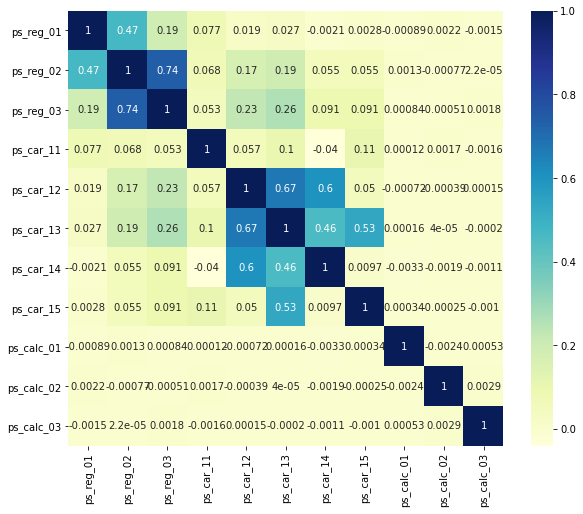

In [23]:
plt.figure(figsize=(10,8))
corr_continuous=x[continuous].corr()
sns.heatmap(corr_continuous,square=True,annot=True,cmap='YlGnBu')

Among the continuous variables,ps_reg_02 and ps_reg_03 have a strong postive correlation, so either of them can be removed.The same applies for ps_car_12 and ps_car_13.

<AxesSubplot:>

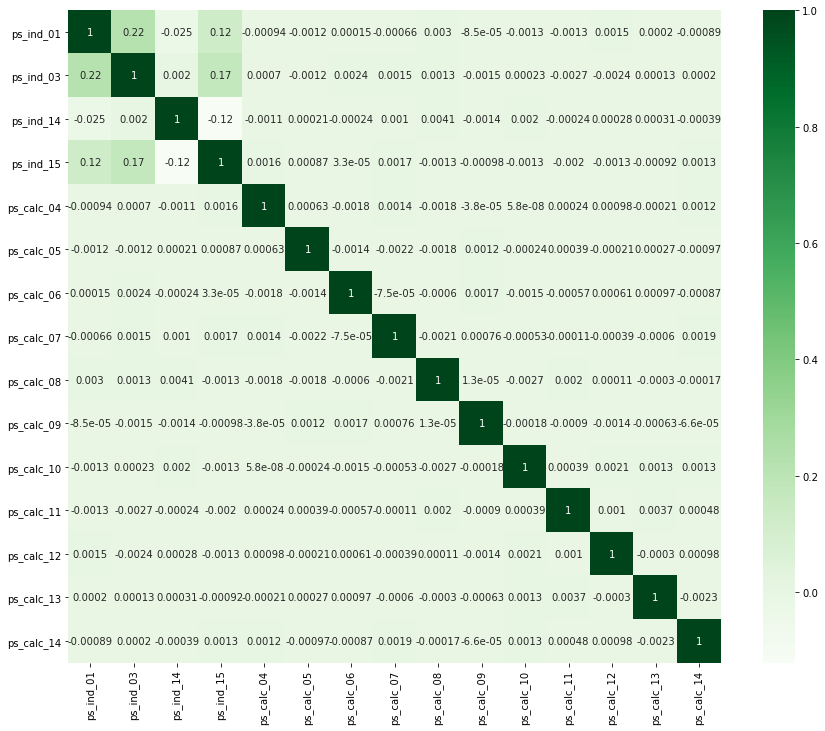

In [25]:
plt.figure(figsize=(15,12))
corr_ordinal=x[ordinal].corr()
sns.heatmap(corr_ordinal,square=True,annot=True,cmap='Greens')

No strong correlations are observed in the Ordinal variables.

### Checking feature importances

The contribution of each of the predictor variables to the prediction can be evaluated using Recursive feature elimination technique(RFE),statistical methods or the in_built decision tree method of XGBoost classifier. 

In [26]:
importance_model=XGBClassifier()
importance_model.fit(x,y)

[11:37:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
imp=importance_model.feature_importances_

<BarContainer object of 57 artists>

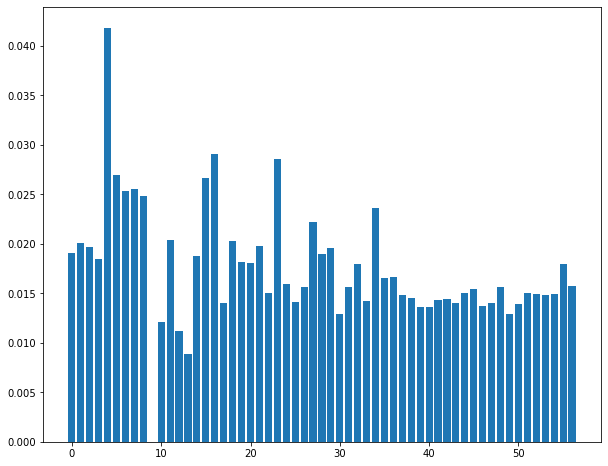

In [41]:
plt.figure(figsize=(10,8))
plt.bar(range(len(imp)),imp)

In [44]:
importances=pd.DataFrame(imp,index=x.columns,columns=['IMPORTANCE'])
importances

,IMPORTANCE
ps_ind_01,0.019118
ps_ind_02_cat,0.020086
ps_ind_03,0.019646
ps_ind_04_cat,0.018457
ps_ind_05_cat,0.041839
ps_ind_06_bin,0.026932
ps_ind_07_bin,0.025347
ps_ind_08_bin,0.025555
ps_ind_09_bin,0.024807
ps_ind_10_bin,0.000000


From the above feature importances, it is obvious that all the features contribute considerably to the prediction, therefore principle component analysis for dimensionality reduction will not be an appropriate option.However inorder to avoid multicollinearity we can eliminate one of the two strongly correlated variables taking their importances in to account.

Among 'ps_reg_02' and 'ps_reg_03', the latter has less importance, so can be removed.

Among 'ps_car_12' and 'ps_car_13', the former has less importance, so can be removed.

Also the variable 'ps_ind_10_bin' does not seem to contribute to the prediction, so can be eliminated.

In [47]:
x.drop(['ps_reg_03','ps_car_12','ps_ind_10_bin'],axis=1,inplace=True)

### Dealing with the null values

In [ ]:
mean_impute=SimpleImputer(strategy='mean',missing_values=np.NaN)
mode_impute=SimpleImputer(strategy='most_frequent',missing_values=np.NaN)

In [48]:
# A loop is made for imputing categorical variables with mode and continuous values with mean
for i in x.columns:
    if x[i].isnull().sum()>0:
        if 'cat' in i:
            x[i]=mode_impute.fit_transform(np.array(x[i]).reshape(-1,1))
        elif 'bin' in i:
            x[i]=mode_impute.fit_transform(np.array(x[i]).reshape(-1,1))
        elif x[i].dtype=='float64':
            x[i]=mean_impute.fit_transform(np.array(x[i]).reshape(-1,1))
        elif x[i].dtype=='int64':
            x[i]=mode_impute.fit_transform(np.array(x[i]).reshape(-1,1))
    

In [50]:
x.isnull().sum()

ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0
ps_calc_13        0
ps_calc_14        0
ps_calc_15_bin    0
ps_calc_16_bin    0


### Normalizing the continuous variables

In [51]:
scaler=StandardScaler()

In [53]:
for i in x.columns:
    if 'cat' not in i or 'bin' not in i: 
        if x[i].dtype=='float64':
            x[i]=scaler.fit_transform(np.array(x[i]).reshape(-1,1))

### Splitting the dataset into train and test data

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

### Synthetic data generation to balance the target variable values

Since the target variable values are imbalanced and it can cause bias in the model,we genrate synthetic data using smote function from imblearn api.

In [56]:
oversampler=SMOTE()

In [57]:
x_train,y_train=oversampler.fit_resample(x_train,y_train)

<AxesSubplot:xlabel='target', ylabel='count'>

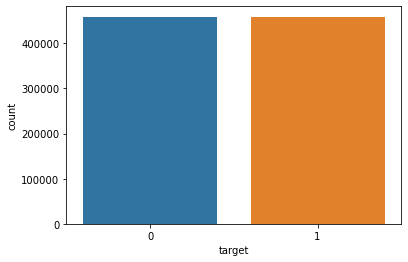

In [58]:
sns.countplot(y_train)

### Building the machine learning model

To find out the best model for this particular classification problem all the important machine learning models are tried out and to find out the one which is more effective an Receiver operating charecteristic(ROC) curve and corresponding area under the curve(AUC) are considered for each model.

In [29]:
logr=LogisticRegression()
knn=KNeighborsClassifier(n_neighbors=3)
forest=RandomForestClassifier(max_depth=4)
adab=AdaBoostClassifier()
xgb=XGBClassifier(max_depth=4)

In [30]:
logr.fit(x_train,y_train)


LogisticRegression()

In [31]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:

forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=4)

In [33]:
adab.fit(x_train,y_train)

AdaBoostClassifier()

In [34]:
xgb.fit(x_train,y_train,verbose=False)

[09:42:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
model_list=[logr,knn,forest,adab,xgb]

In [38]:
colors=['r','g','b','y','m']
labels=['logistic regression','K nearest neighbour ','Random forest','Adaboost','Xgboost']

In [38]:
for i in model_list:
    print('accuracy score for',i,'model is')
    print(accuracy_score(y_true=y_test,y_pred=i.predict(x_test.values)))

accuracy score for LogisticRegression() model is
0.8679888779684651
accuracy score for KNeighborsClassifier(n_neighbors=3) model is
0.6928420822727922
accuracy score for RandomForestClassifier(max_depth=4) model is
0.8251976176675655
accuracy score for AdaBoostClassifier() model is
0.9039758742639215
accuracy score for XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) model is
0.9631645707853465


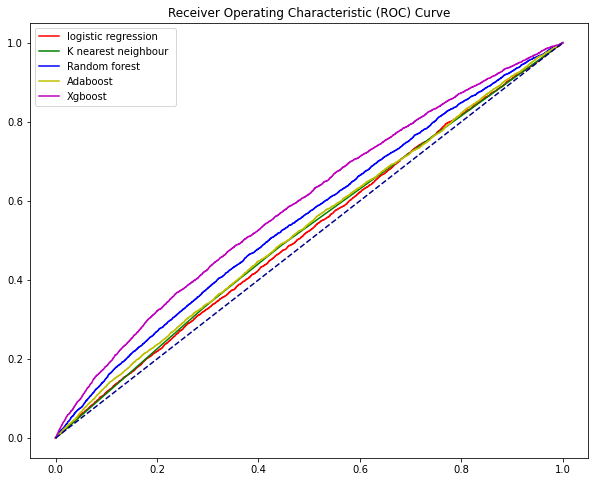

In [51]:
a=0
b=0
plt.figure(figsize=(10,8))
for i in model_list:
    fpr,tpr,thresholds=roc_curve(y_test,i.predict_proba(x_test.values)[:,1])
    plt.plot(fpr,tpr,color=colors[a],label=labels[b])
    a=a+1
    b=b+1
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
    

In [40]:
for i in model_list:
    print('auc for',i,'model is')
    print(roc_auc_score(y_test,i.predict_proba(x_test)[:,1]))

auc for LogisticRegression() model is
0.5200065882309699
auc for KNeighborsClassifier(n_neighbors=3) model is
0.5204316409080771
auc for RandomForestClassifier(max_depth=4) model is
0.5514026284861671
auc for AdaBoostClassifier() model is
0.529714982236698
auc for XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) model is
0.5955971765758674


### Hyper-parameter tuning

From the above results it can be concluded tht among the various classification model the best one whic suits the problem in hand is the XGBoost classifier model. Inorder to further improve the accuracy hyperparameter tuning is done to find out the best combination of parameters for the XGBoost model.

In [ ]:
parameters={'max_depth':[2,3,4,5],'n_estimators':[200,500,750,1000,1500,2000],'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6]}
model=XGBClassifier()
grid=RandomizedSearchCV(model,parameters,cv=3)

In [29]:
grid.fit(x,y)

[21:17:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:21:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:29:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                          

In [30]:
grid.best_params_

{'n_estimators': 750, 'max_depth': 3, 'learning_rate': 0.1}

In [31]:
grid.best_score_

0.9635558422881259

In [59]:
best_model=XGBClassifier(n_estimators=750,max_depth=3,learning_rate=0.1)

In [60]:
best_model.fit(x_train,y_train)

[12:08:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## SAVING AND TESTING THE BEST MODEL

In [61]:
import joblib

In [62]:
joblib.dump(best_model,'insurance_claim_xgb_model')

['insurance_claim_xgb_model']

In [63]:
model=joblib.load('insurance_claim_xgb_model')

In [64]:
predictions=model.predict(x_test)

In [66]:
accuracy_score(y_true=y_test,y_pred=predictions)

0.9631645707853465

## Project Analysis
The object of this project was to build a Machine learning model to predict whether a auto insurance policy holder files a claim or not. The given dataset had 59 features including 'target' and irrevelant features like 'ID'. The size of the data itself was the first issue to be adressed as it can increase the computational complexity.Firstly,The target variable and the predictor variables were split into seperate variables and then features were organized into seperate lists of continuous, binary,categorical(nominal) and ordinal variables. To check multi-collinearity within continuous and ordinal variables, heatmaps(from seaborn package) of the same were plotted to find out that some of the continuous features shown strong correlation.One among two strongly correlated features were eliminated after considering their significance in the prediction using XGBclassifier.

The null values in the dataset were assigned the value -1 which were replaced by the standard NaN form and then imputed using the SimpleImputer from scikit learn. The null values in all the categorical variables were replaced with the most frequent(mode) value, while that of continuous variables were replaced with the average(mean value).
Afterwards the data was split into training and test data by using the train_test_split function from scikit learn.
It was observed that the target variable values were imbalanced in the dataset. Considering that the imbalanced dataset can lead to a biased and inaccurate model, SMOTE package from imblearn API was used for oversampling or synthetic data generation to balance the dataset.

Since there is no single perfect model for all the prediction tasks, all the classification algorithms including Logistic regression, Random forest classifier, XGBoost classifier, AdaBoost classifier and K-nearest Neighbour classifer, were tried out and the most effective one was chosen by plotting the receiver operator curves(ROC) and evaluating the Area under the curve values(AUC) for each of the models.
XGBclassifier was found to be the most effective in prediction and hyperparameter tuning for the same was carried out using the RandomizedSearchCV function from scikit learn. The best model was saved using the joblib package and was tested on the test data to get an accuracy of ~96.35%
